In [18]:
################# importing necessary packages and modules #####################

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
############### reading the data - ############################################

dataset = pd.read_csv("casualty_classification.csv")

In [44]:
dataset.head()

,road_type,speed_limit,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,carriageway_hazards,urban_or_rural_area,trunk_road_flag,accident_severity
0,2,30,0,4,4,1,1,0,1,2,1
1,3,20,0,1,4,8,2,0,1,2,1
2,2,20,0,4,1,1,2,0,1,2,1
3,6,30,0,5,5,1,2,0,1,2,1
4,3,30,0,0,4,2,2,2,2,2,1


In [45]:
dataset.shape

(7616, 11)

In [46]:
dataset.describe()

,road_type,speed_limit,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,carriageway_hazards,urban_or_rural_area,trunk_road_flag,accident_severity
count,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000
mean,5.226234,32.544643,0.615678,1.740809,2.326287,1.710215,1.456933,0.298976,1.198398,1.878020,1.939338
std,1.718968,13.360425,2.203265,2.797437,1.815168,1.875559,1.166048,1.498620,0.399149,0.529582,0.646418
min,1.000000,20.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000
25%,3.000000,20.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000
50%,6.000000,30.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000
75%,6.000000,30.000000,0.000000,4.000000,4.000000,1.000000,2.000000,0.000000,1.000000,2.000000,2.000000
max,9.000000,70.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,3.000000,2.000000,3.000000


In [220]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   road_type                                7616 non-null   int64
 1   speed_limit                              7616 non-null   int64
 2   pedestrian_crossing_human_control        7616 non-null   int64
 3   pedestrian_crossing_physical_facilities  7616 non-null   int64
 4   light_conditions                         7616 non-null   int64
 5   weather_conditions                       7616 non-null   int64
 6   road_surface_conditions                  7616 non-null   int64
 7   carriageway_hazards                      7616 non-null   int64
 8   urban_or_rural_area                      7616 non-null   int64
 9   trunk_road_flag                          7616 non-null   int64
 10  accident_severity                        7616 non-null   int64
dtypes: i

In [47]:
##################  to check if there are missing values    ###################

dataset.isnull().sum()

road_type                                  0
speed_limit                                0
pedestrian_crossing_human_control          0
pedestrian_crossing_physical_facilities    0
light_conditions                           0
weather_conditions                         0
road_surface_conditions                    0
carriageway_hazards                        0
urban_or_rural_area                        0
trunk_road_flag                            0
accident_severity                          0
dtype: int64

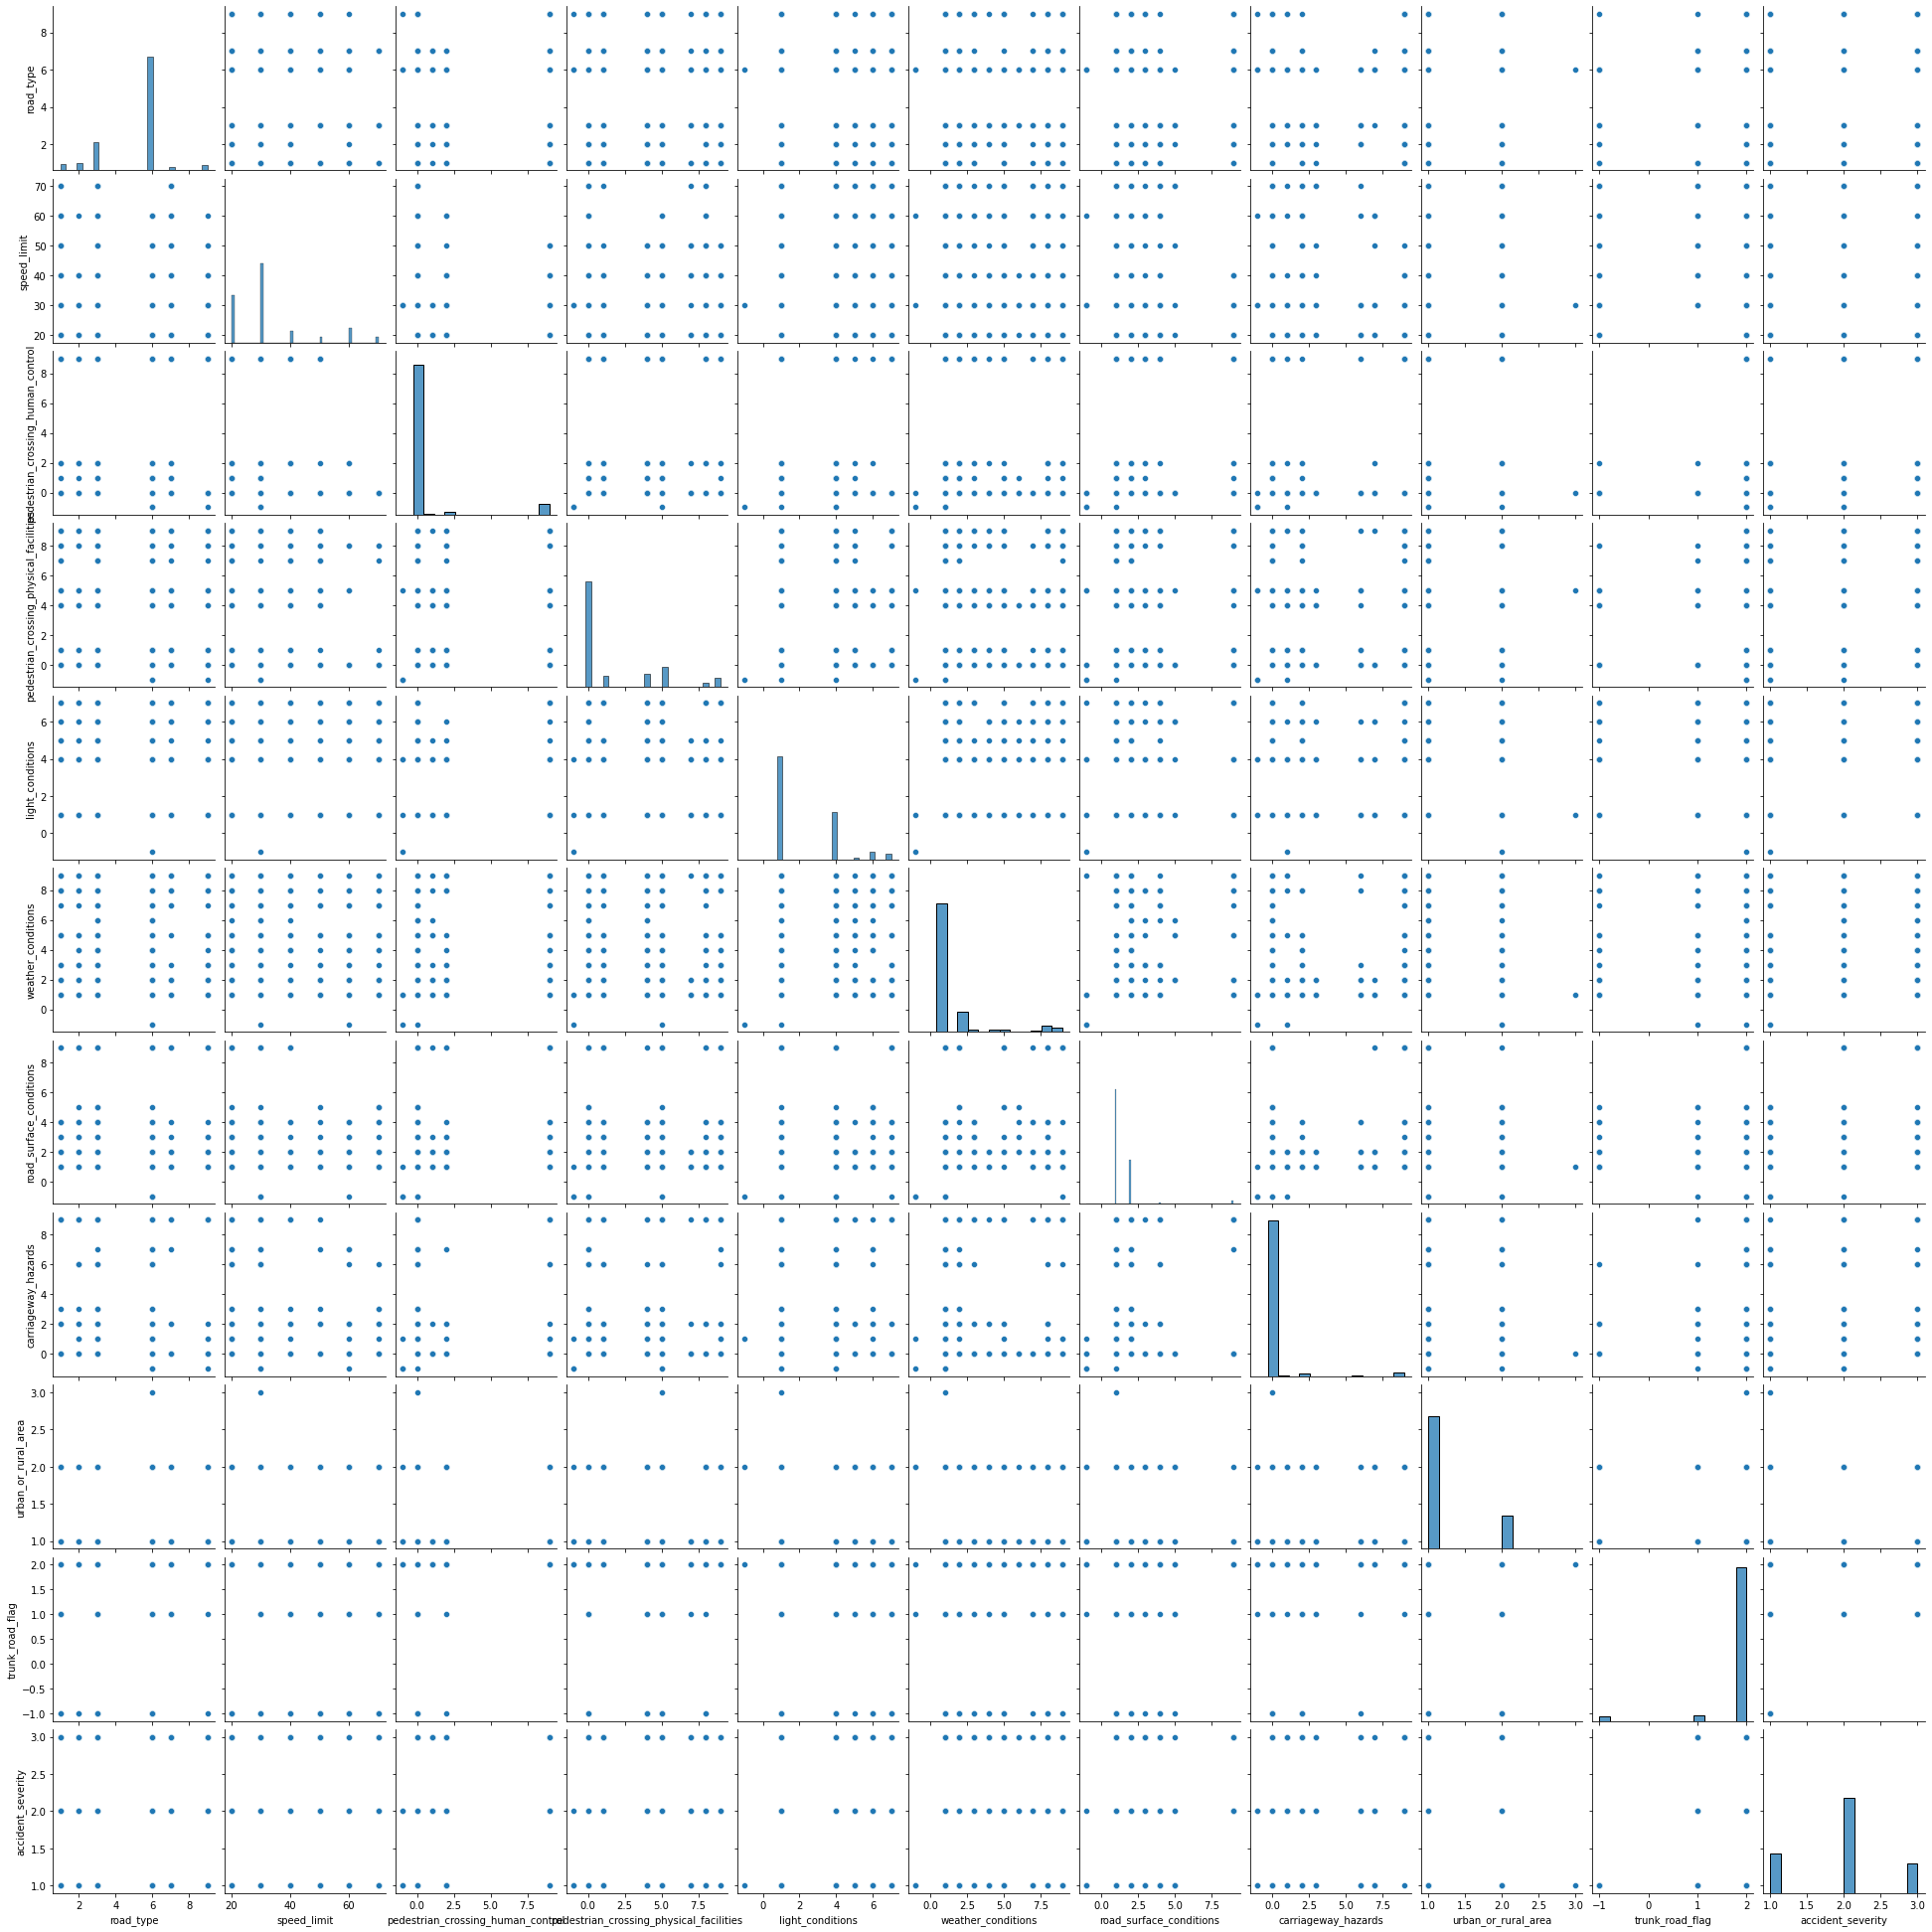

In [48]:
###########  to visualise the variables ###################################

sns.pairplot(dataset)
plt.show()

In [20]:
############### defining input variables and the target label  ###################

X = dataset.drop(["accident_severity"], axis=1)
y = dataset.accident_severity

In [21]:
#############  splitting dataset into train-test at ratio 4:1  ###################

from sklearn.model_selection import train_test_split
X_trained, X_tested, y_train, y_test =train_test_split(X, y, test_size =0.2, random_state = 42, shuffle = True)

In [22]:
###########  to standardise the data before training  ######################

from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train =Scaler_X.fit_transform(X_trained)
X_test =Scaler_X.transform(X_tested)

In [69]:
############  initiating kNN classification with hypothetical n_neighbors = 3    ###########

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =3, weights = "uniform", metric = "minkowski", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [70]:
############ Applying the trained kNN model to predict target label values ###########

y_pred = classifier.predict(X_test)
print(y_pred)

[1 2 2 ... 3 1 2]


In [71]:
asps = y_test.value_counts()
print(asps)

2    846
1    400
3    278
Name: accident_severity, dtype: int64


In [188]:
############ Printing the test data to evaluate predictions ###########

print(y_test)

1321    1
3007    2
1972    2
132     1
1430    1
       ..
1832    1
4237    2
3412    2
506     1
4294    2
Name: accident_severity, Length: 1524, dtype: int64


In [72]:
################ Using confusion matrix to evaluate the performance of the classification model ############

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.61      0.62       400
           2       0.67      0.78      0.72       846
           3       0.50      0.28      0.36       278

    accuracy                           0.64      1524
   macro avg       0.60      0.56      0.57      1524
weighted avg       0.63      0.64      0.63      1524



In [190]:
################ Using in-built accuracy report to valuate the performance of the classification model ############

from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6430446194225722

              precision    recall  f1-score   support

           1       0.62      0.61      0.62       400
           2       0.67      0.78      0.72       846
           3       0.50      0.28      0.36       278

    accuracy                           0.64      1524
   macro avg       0.60      0.56      0.57      1524
weighted avg       0.63      0.64      0.63      1524



              precision    recall  f1-score   support

           1       0.62      0.61      0.62       400
           2       0.67      0.78      0.72       846
           3       0.50      0.28      0.36       278

    accuracy                           0.64      1524
   macro avg       0.60      0.56      0.57      1524
weighted avg       0.63      0.64      0.63      1524



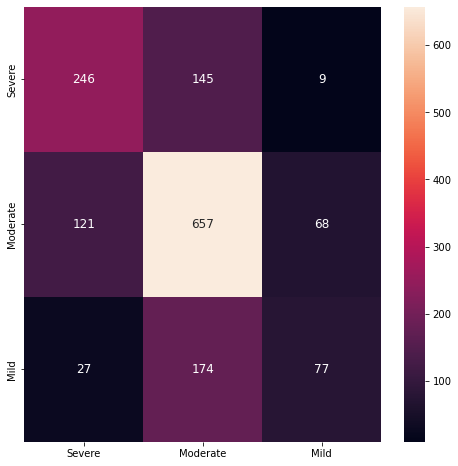

In [79]:
####### Printing the classification report - performance evaluation #########

print(classification_report(y_test, y_pred))
################ Integrating the confusion matrix into the classification report ############
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
classes_names = ['Severe','Moderate','Mild']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=classes_names, index = classes_names)                 
sns.heatmap(cm, annot=True, annot_kws = {"size" : 12}, fmt='d');


In [197]:
########    Finding the optimal number of n_neighbors to improve the model       ######
from sklearn.metrics import accuracy_score



########    to store the classification accuracies through the iteration        ########## 
accuracies = []

########     Calculating accuracy score for n values between 1 and 20           ########
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
########    Appending the accuracy score for every n iteration from the model  #########
    accuracies.append(accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Accuracy Score')

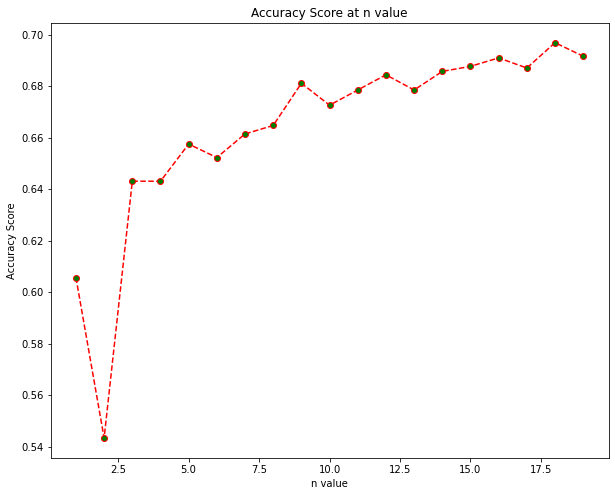

In [200]:
########   Visualising the output of the hyperparametre to determine optimal n #########

plt.figure(figsize=(10, 8))
plt.plot(range(1, 20), accuracies, color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=6)
         
plt.title('Accuracy Score at n value')
plt.xlabel('n value')
plt.ylabel('Accuracy Score')

In [74]:
############## Fitting the optimal value of n = 17 to the kNN model   #########

from sklearn.neighbors import KNeighborsClassifier
updated_classifier = KNeighborsClassifier(n_neighbors =17,weights = "uniform", metric = "minkowski", p = 2)
updated_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [76]:
############ Applying the updated kNN model to predict target label values ###########

y_pred_new = updated_classifier.predict(X_test)
print(y_pred_new)

[1 2 2 ... 3 1 2]


              precision    recall  f1-score   support

           1       0.80      0.60      0.69       400
           2       0.67      0.89      0.76       846
           3       0.56      0.18      0.27       278

    accuracy                           0.69      1524
   macro avg       0.68      0.56      0.57      1524
weighted avg       0.68      0.69      0.65      1524



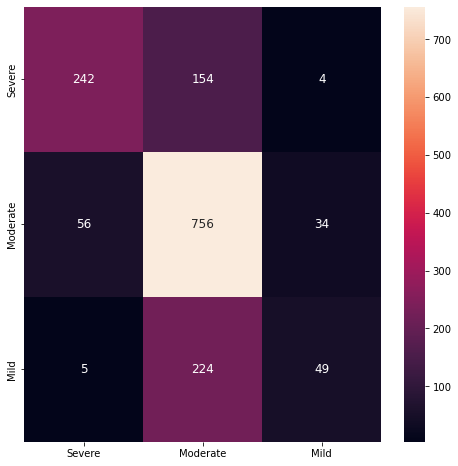

In [80]:
####### Printing the  updated classification report - performance evaluation #########

print(classification_report(y_test, y_pred_new))
################ Integrating the confusion matrix into the classification report ############

plt.figure(figsize = (8,8))
classes_names = ['Severe','Moderate','Mild']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_new), columns=classes_names, index = classes_names)                 
sns.heatmap(cm, annot=True, annot_kws = {"size" : 12}, fmt='d');